In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# https://www.kaggle.com/hugodarwood/epirecipes/data
raw_data = pd.read_csv('./data/epi_r.csv')
raw_data.head(3)

# Goal: see is if we can use the ingredient and keyword list to predict the rating

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data['rating']

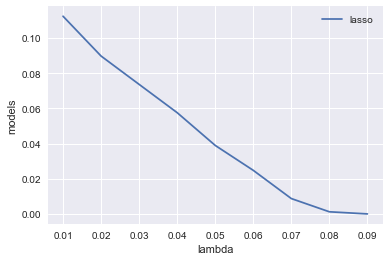

In [4]:
# Let's try Lasso
from sklearn import linear_model

results = pd.DataFrame(columns=["lasso", "lambda"])

for lambd in np.arange(0.01,0.1,0.01):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X, Y)
    lass_score = lass.score(X, Y)
        
    res = pd.DataFrame([[lass_score, lambd]], columns=["lasso", "lambda"])

    results = results.append(res)

plt.plot(results['lambda'], results['lasso'])
plt.xlabel('lambda')
plt.ylabel('models')
plt.legend(["lasso"])
plt.show()

In [5]:
lass = linear_model.Lasso(alpha=.03)
lass.fit(X, Y)
lass_score = lass.score(X, Y)

np.append(lass.coef_, lass.intercept_)

array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.31328419, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.  

In [6]:
features_to_keep = np.where(lass.coef_ != 0, True, False)

In [7]:
np.count_nonzero(features_to_keep == True)

4

In [8]:
df = raw_data.copy()
df = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
df.iloc[: , features_to_keep]

,bon appétit,drink,gourmet,peanut free
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,1.0


In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

raw_data["high_low"] = np.where(raw_data["rating"] >=3.5, "high", "low")

X = raw_data.drop(['high_low', 'rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data['high_low']

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, Y, cv=10)

array([ 0.83000997,  0.83200399,  0.82502493,  0.82751745,  0.83848455,
        0.83640898,  0.84389027,  0.81736527,  0.84131737,  0.83233533])

In [20]:
rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc.feature_importances_

array([  7.89544941e-05,   1.68342402e-06,   2.23764694e-05,
         1.95122330e-03,   4.44140922e-05,   1.58393070e-03,
         2.48051529e-04,   0.00000000e+00,   5.86584426e-03,
         3.09044133e-03,   2.44020413e-04,   1.08825207e-03,
         1.53224542e-03,   5.11826992e-04,   1.60805876e-05,
         2.34978159e-04,   4.87797319e-03,   3.77225197e-03,
         1.75128823e-05,   1.89651857e-03,   2.09836806e-05,
         1.56578157e-03,   1.16109806e-03,   6.38303087e-04,
         1.57760005e-03,   0.00000000e+00,   1.01624971e-04,
         1.91342260e-04,   1.82743124e-03,   1.56013113e-03,
         3.58055042e-03,   2.52013192e-03,   9.53556260e-03,
         2.25763033e-03,   6.69761668e-04,   3.49775317e-03,
         2.89289573e-04,   4.08339049e-04,   3.27214559e-03,
         3.21002492e-03,   2.46586728e-04,   1.50464358e-04,
         1.65585538e-04,   6.26128424e-04,   1.62455593e-03,
         3.47017473e-03,   2.62662857e-03,   0.00000000e+00,
         1.12636051e-03,

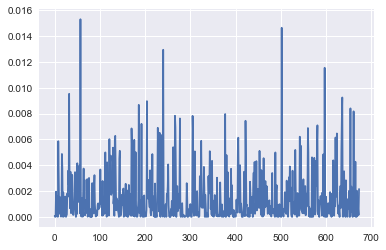

In [24]:
plt.plot(rfc.feature_importances_)

In [12]:
# Random forrest on half the features

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

raw_data["high_low"] = np.where(raw_data["rating"] >=3.5, "high", "low")

X = raw_data.drop(['high_low', 'rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
X = X.iloc[:, :300]
Y = raw_data['high_low']

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, Y, cv=10)

array([ 0.83150548,  0.83499501,  0.82701894,  0.82402792,  0.83549352,
        0.83291771,  0.84588529,  0.8258483 ,  0.83133733,  0.82934132])

In [13]:
rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
top_features_name = []
top_features_position = []

rfc.n_features_

674

In [59]:
top_100 = np.argpartition(rfc.feature_importances_, -100)[-100:]
for t in top_100:
    print(raw_data.columns[t])


food processor
peanut
pasta maker
parsley
south carolina
paprika
soufflé/meringue
soy sauce
pancake
pan-fry
pennsylvania
celery
burrito
okra
oklahoma
coffee
slow cooker
coffee grinder
cinnamon
no meat, no problem
steam
new orleans
anchovy
stock
new mexico
amaretto
banana
cinco de mayo
poach
molasses
atlanta
michigan
chicago
beef
chartreuse
pork chop
shavuot
shallot
beet
asparagus
cucumber
cumin
tart
low cholesterol
dairy
louisiana
los angeles
texas
lobster
date
tilapia
berry
lentil
chocolate
lemon
lancaster
lamb
biscuit
dip
kentucky derby
tuna
turnip
utah
kale
kahlúa
drink
vegan
blackberry
prune
raw
roast
candy
chile
22-minute meals
bon app��tit
chickpea
honey
rum
harpercollins
hanukkah
watercress
hamburger
broccoli
haiti
engagement party
grape
sandwich theory
whiskey
germany
fry
fruit juice
windsor
family reunion
fritter
san francisco
friendsgiving
freezer food
freeze/chill
fig
mexico


In [65]:
top_30 = np.argpartition(rfc.feature_importances_, -30)[-30:]

In [74]:
# random forest based on top 30

# Random forrest on half the features

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

raw_data["high_low"] = np.where(raw_data["rating"] >=3.5, "high", "low")

X = raw_data[raw_data.columns[top_30]]
# X["peanut free"] = raw_data["peanut free"]
# X["gourmet"] = raw_data["gourmet"]
Y = raw_data['high_low']

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, Y, cv=10)

array([ 0.79312064,  0.79312064,  0.79710867,  0.79760718,  0.79661017,
        0.80299252,  0.8084788 ,  0.79441118,  0.7999002 ,  0.79341317])

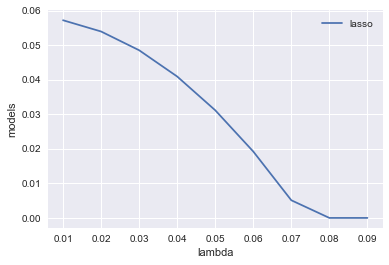

In [78]:
# Let's try Lasso
from sklearn import linear_model

results = pd.DataFrame(columns=["lasso", "lambda"])

Y = raw_data["rating"]

for lambd in np.arange(0.01,0.1,0.01):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X, Y)
    lass_score = lass.score(X, Y)
        
    res = pd.DataFrame([[lass_score, lambd]], columns=["lasso", "lambda"])

    results = results.append(res)

plt.plot(results['lambda'], results['lasso'])
plt.xlabel('lambda')
plt.ylabel('models')
plt.legend(["lasso"])
plt.show()

In [79]:
lass = linear_model.Lasso(alpha=.035)
lass.fit(X, Y)
lass_score = lass.score(X, Y)

np.append(lass.coef_, lass.intercept_)

array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.74671715,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        3.75494622])

In [80]:
features_to_keep = np.where(lass.coef_ != 0, True, False)

In [86]:
df = raw_data[raw_data.columns[top_30]]
df.iloc[: , features_to_keep]

,drink
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


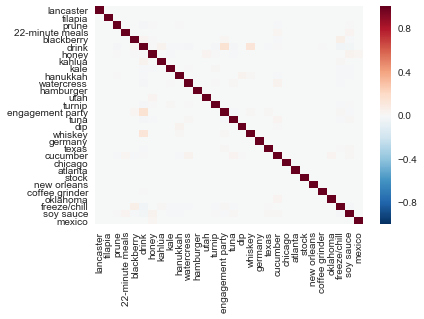

In [87]:
import seaborn as sns
corr = raw_data[raw_data.columns[top_30]].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)